In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
df = pd.read_csv('Zoo.csv')

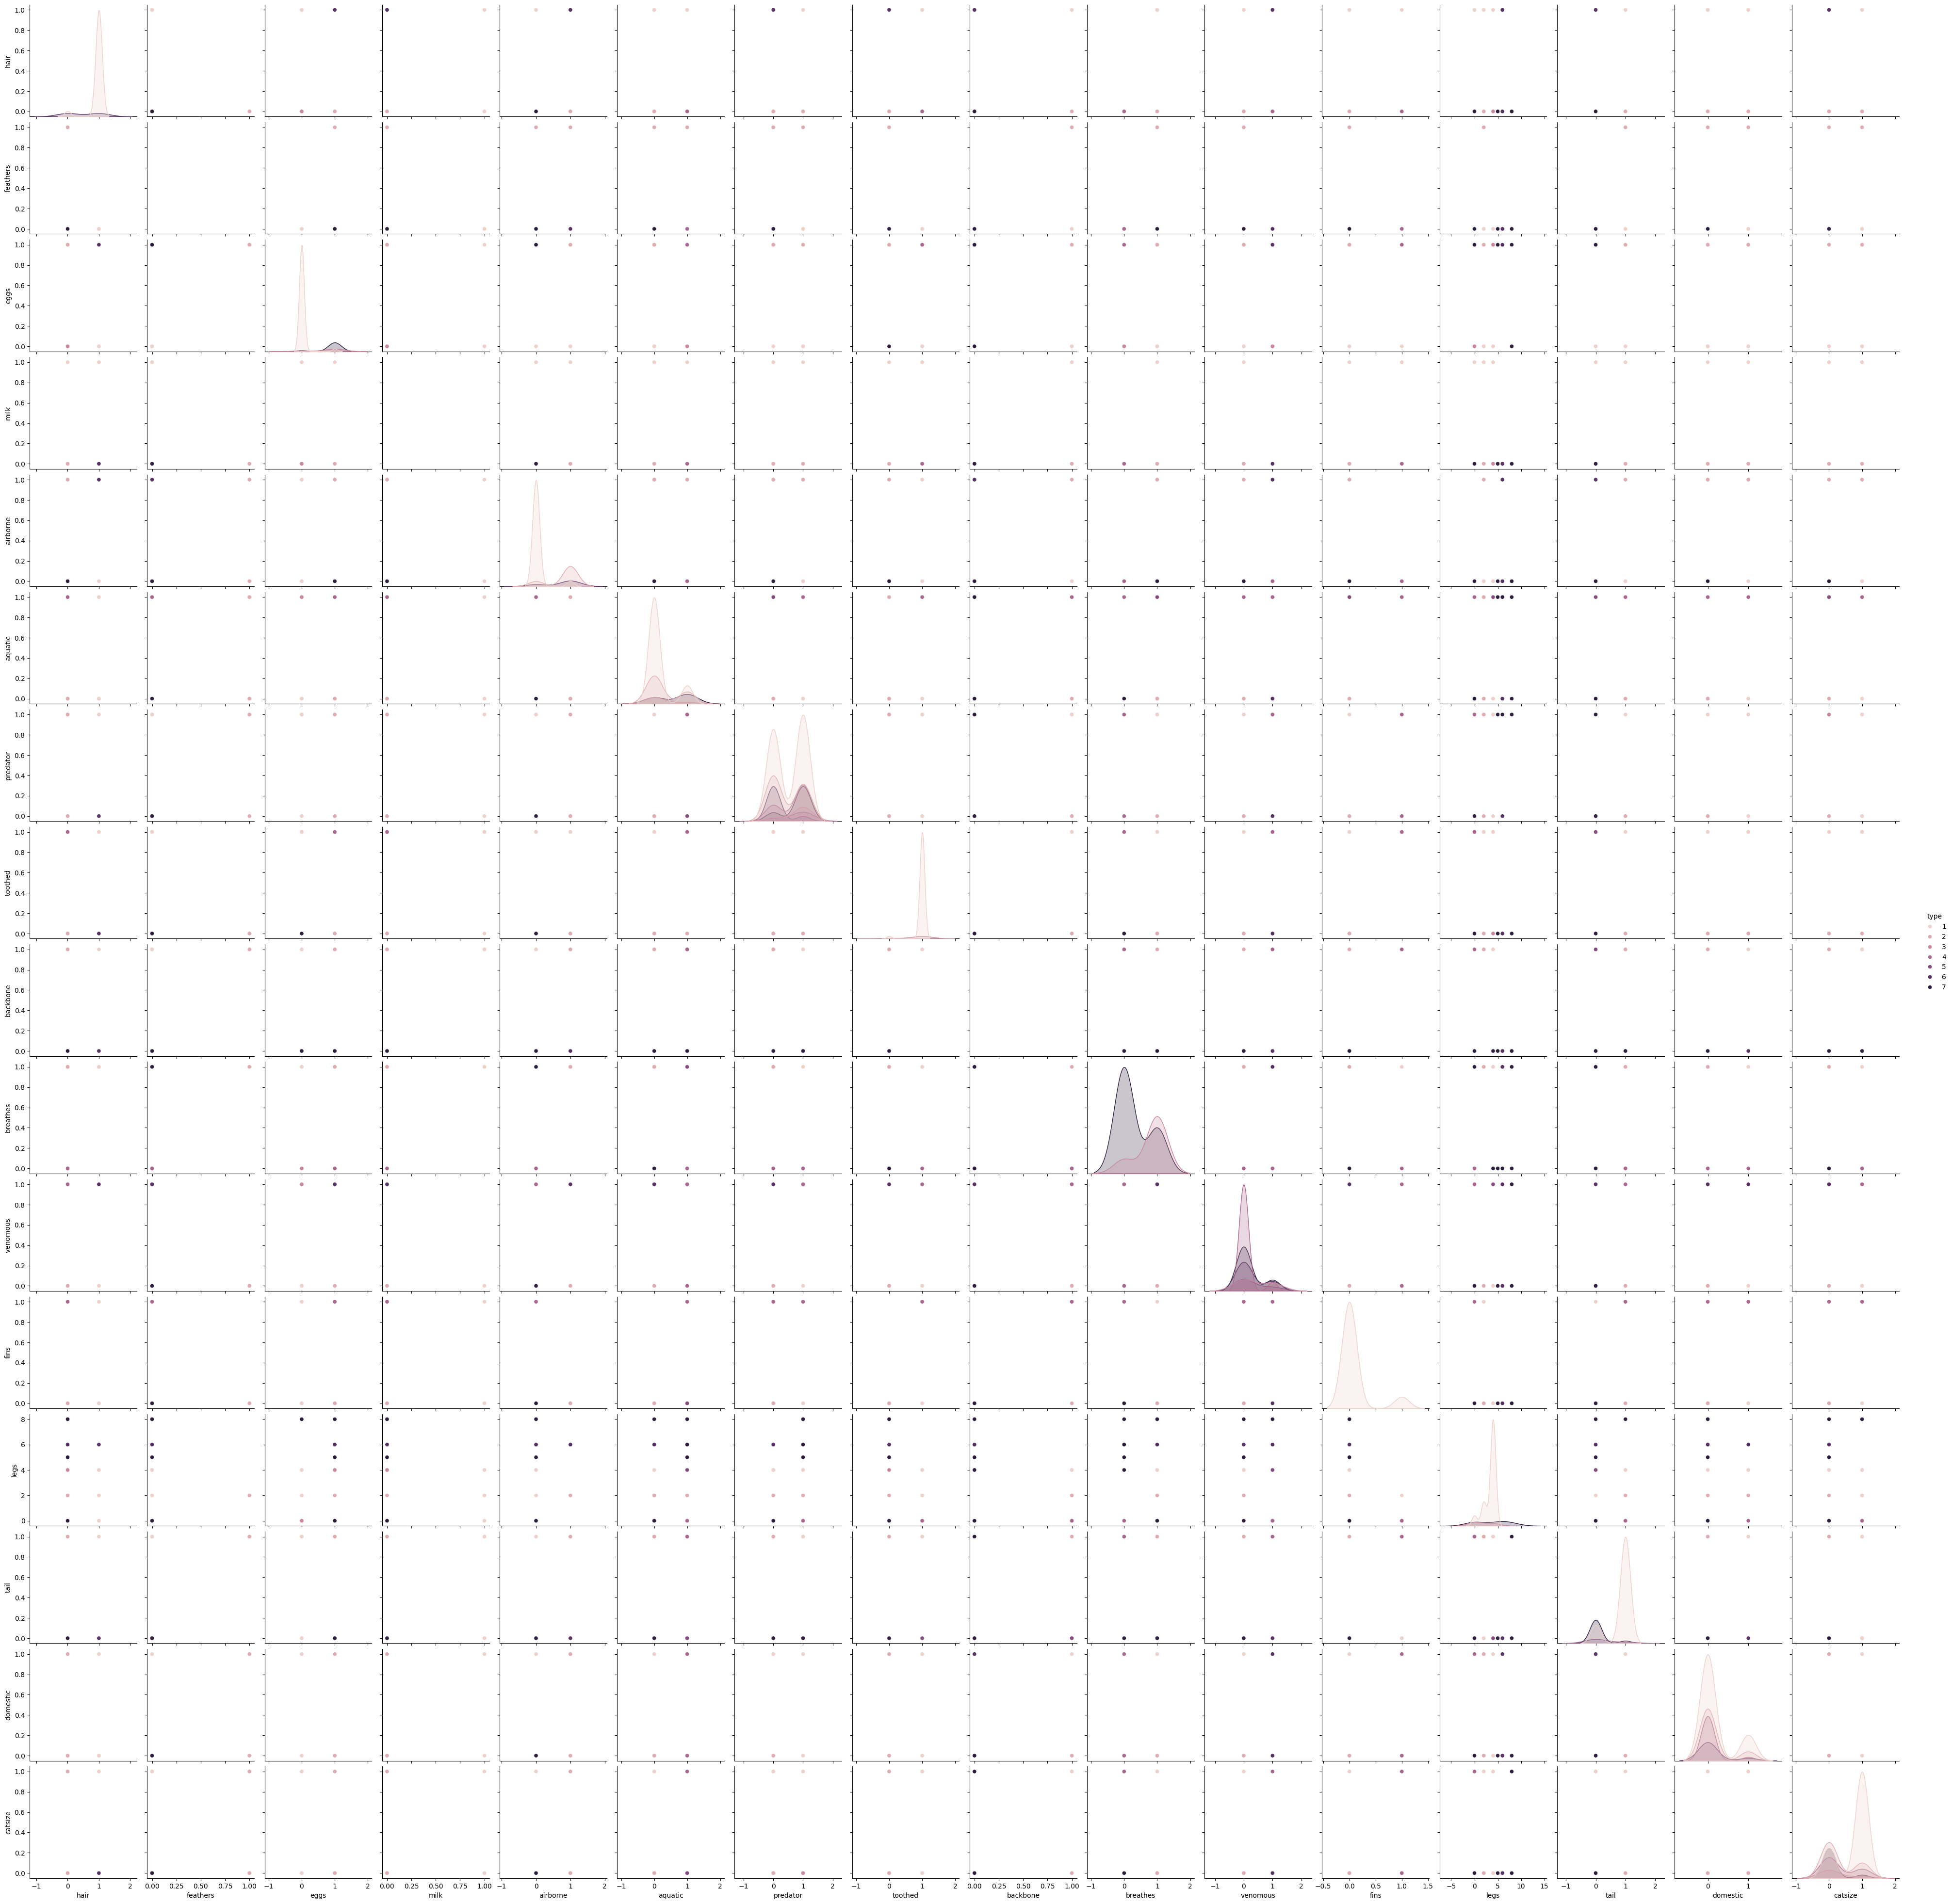

In [7]:
# 1. Data Analysis with Visualizations
sns.pairplot(df, hue='type')  # 'type' is the target variable
plt.show()

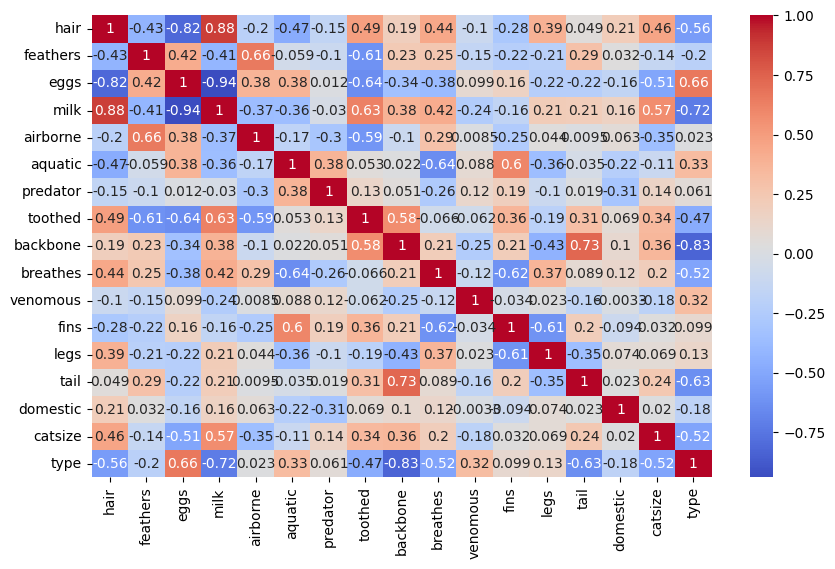

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['animal name']).corr(), annot=True, cmap='coolwarm')  # Exclude animal name
plt.show()

In [11]:
# Drop the "animal name" column since it's not a feature for classification
df = df.drop(columns=['animal name'])

In [13]:
# Split features and target variable
X = df.drop(columns=['type'])  # 'type' is the target variable
y = df['type']

In [15]:
# 2. Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 3. Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# 4. Implement KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Start with K=5
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
# 5. Evaluate classifier
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C

In [23]:
# 6. Choosing the best K value using cross-validation
accuracies = []
for k in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
best_k = 1 + 2 * accuracies.index(max(accuracies))
print("Best K value:", best_k)

Best K value: 3


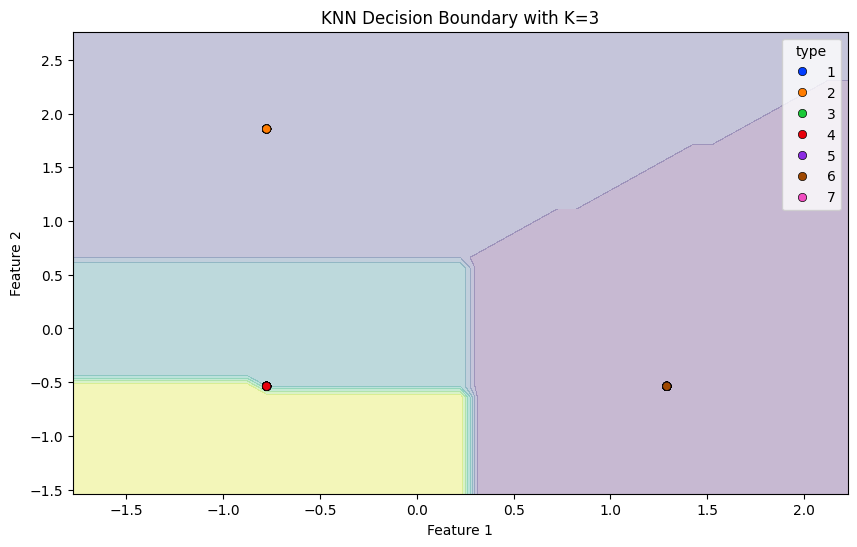

In [25]:
# 7. Decision Boundary Visualization (for first two features only, for visualization purposes)
feature1, feature2 = X_train[:, 0], X_train[:, 1]
x_min, x_max = feature1.min() - 1, feature1.max() + 1
y_min, y_max = feature2.min() - 1, feature2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train[:, :2], y_train)  # Using only the first two features
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=feature1, y=feature2, hue=y_train, palette="bright", edgecolor="k")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("KNN Decision Boundary with K=" + str(best_k))
plt.show()